In [64]:
import requests
from bs4 import BeautifulSoup
import re

headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}

member_list_300 = []
for index in range(1,31):
    url = f'https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex={index}'
    print(url)
    res = requests.get(url, headers=headers)
    #print(res.status_code)
    if res.ok:
        #print(res.json()['resultList'])
        member_list_10 = []
        for member in res.json()['resultList']:
            member_list_10.append(member) 
        
        #print(member_list_10)
        member_list_300.extend(member_list_10)
    else:
        print(res.status_code)
print(len(member_list_300))
print(member_list_300[:3])

https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=1
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=2
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=3
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=4
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=5
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=6
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=7
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=8
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=9
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=10
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=11
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=12
https://www.assembly.go.kr/portal/cnts/cntsNaas/f

In [65]:
from pprint import pprint

pprint(member_list_300[:3])

[{'cmitNm': '교육위원회',
  'electGbnNm': '비례대표',
  'hgNm': '강경숙',
  'mImgUrl': '/static/portal/img/openassm/new/68f83caf0c9e4546b1694ead863f45ce.jpg',
  'mLinkUrl': '/members/22nd/KANGKYUNGSOOK',
  'mThumbImgUrl': '/static/portal/img/openassm/new/thumb/68f83caf0c9e4546b1694ead863f45ce.jpg',
  'monaCd': 'T2T8225E',
  'openNaId': 'KANGKYUNGSOOK',
  'origNm': '비례대표',
  'polyNm': '조국혁신당',
  'reeleGbnNm': '초선',
  'rnum': 1,
  'sexGbnNm': '여',
  'st': '22',
  'unitNm': '제22대'},
 {'cmitNm': '국방위원회',
  'electGbnNm': '지역구',
  'hgNm': '강대식',
  'mImgUrl': '/static/portal/img/openassm/new/d1fe9f0902d84f0ba74f721d3298be7f.png',
  'mLinkUrl': '/members/22nd/KANGDAESIK',
  'mThumbImgUrl': '/static/portal/img/openassm/new/thumb/d1fe9f0902d84f0ba74f721d3298be7f.png',
  'monaCd': 'L2I9861C',
  'openNaId': 'KANGDAESIK',
  'origNm': '대구 동구군위군을',
  'polyNm': '국민의힘',
  'reeleGbnNm': '재선',
  'rnum': 2,
  'sexGbnNm': '남',
  'st': '22',
  'unitNm': '제22대'},
 {'cmitNm': '환경노동위원회, 기후위기 특별위원회',
  'electGbnNm': '지역구',

#### Json 데이터와 상세페이지 스크래핑 데이터 를 혼합해서 상세정보 저장하기

In [66]:
import requests
from bs4 import BeautifulSoup
import re
from urllib.parse import urljoin

print('===> 스크래핑 시작')
#297명의 정보를 저장하는 List
member_detail_list = []

headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}

for idx,member in enumerate(member_list_300,1):
    mem_sub_link = member['mLinkUrl']
    detail_url = f'https://www.assembly.go.kr{mem_sub_link}'
    res = requests.get(detail_url, headers=headers)
    print(res.ok, idx, detail_url)
    
    if res.ok:
        soup = BeautifulSoup(res.text, 'html.parser')
        
        #1명의 정보를 저장하는 dict 선언
        member_detail_dict = {}
        
        li_tags = soup.select('ul.list li:nth-of-type(n+4)')
        #print(li_tags)
        # for li in li_tags:
        #     print(type(li.find('dt')))
        #     print(li.find('dt').text)
        
        dt_list = [li_tag.find('dt').text for li_tag in li_tags]
        #print(dt_list)

        dd_list = []        
        for li_tag in li_tags:
            dd_tag = li_tag.find('dd')
            pattern = re.compile(f'[\n\r\t]')
            dd_text = pattern.sub('',dd_tag.text.strip()).replace(" ","")
            dd_list.append(dd_text)
        #print(dd_list)
        
        member_detail_dict = dict(zip(dt_list, dd_list))

        member_detail_dict['이름'] = member['hgNm']        
        member_detail_dict['정당'] = member['polyNm']
        member_detail_dict['성별'] = member['sexGbnNm']
        member_detail_dict['선거구'] = member['origNm']
        member_detail_dict['지역비례'] = member['electGbnNm']

        sosok = member['cmitNm']
        if sosok is not None:
            idx = sosok.find(',')
            if idx > -1:            
                member_detail_dict['소속위원회'] = sosok[:idx]
            else:
                member_detail_dict['소속위원회'] = sosok
        else:        
            member_detail_dict['소속위원회'] = ''    

        # print(member_detail_dict['소속위원회'])                        
        
        member_detail_dict['당선횟수'] = member['reeleGbnNm']
        
        img_sub_url = member['mThumbImgUrl']
        img_url = urljoin(detail_url,img_sub_url)
        #print(img_url)
        member_detail_dict['이미지'] = img_url
        
        #pprint(member_detail_dict)        
                        
        #1명의 정보가 저장된 dict를 list에 추가하기
        member_detail_list.append(member_detail_dict)
    else:
        print(res.status_code)
        
print(len(member_detail_list))
print(member_detail_list[297:])
print('===> 스크래핑 끝')

===> 스크래핑 시작


True 1 https://www.assembly.go.kr/members/22nd/KANGKYUNGSOOK
True 2 https://www.assembly.go.kr/members/22nd/KANGDAESIK
True 3 https://www.assembly.go.kr/members/22nd/KANGDEUKGU
True 4 https://www.assembly.go.kr/members/22nd/KANGMYOUNGGU
True 5 https://www.assembly.go.kr/members/22nd/KANGMINKUK
True 6 https://www.assembly.go.kr/members/22nd/KANGSUNYOUNG
True 7 https://www.assembly.go.kr/members/22nd/KANGSUNWOO
True 8 https://www.assembly.go.kr/members/22nd/KangSeungKyoo
True 9 https://www.assembly.go.kr/members/22nd/KANGJUNHYEON
True 10 https://www.assembly.go.kr/members/22nd/KOHDONGJIN
True 11 https://www.assembly.go.kr/members/22nd/KOMINJUNG
True 12 https://www.assembly.go.kr/members/22nd/KWAKKYUTAEK
True 13 https://www.assembly.go.kr/members/22nd/KWAKSANGEON
True 14 https://www.assembly.go.kr/members/22nd/KUJAKEUN
True 15 https://www.assembly.go.kr/members/22nd/KWEONSEONGDONG
True 16 https://www.assembly.go.kr/members/22nd/KWONYOUNGSE
True 17 https://www.assembly.go.kr/members/22nd/K

KeyboardInterrupt: 

### 웹스크래핑한 데이터를 Pandas DataFrame객체로 저장하여 분석 및 시각화

In [ ]:
import pandas as pd

member_df = pd.DataFrame(columns=['이름','정당','선거구','당선횟수','지역비례','성별','소속위원회','이미지','사무실 전화','사무실 호실',\
                                  '개별 홈페이지','이메일','보좌관','선임비서관','비서관','의원실 안내'])

for member_detail in member_detail_list:
    # Row 하나 생성
    df_new_row = pd.DataFrame.from_records([member_detail])
    member_df = pd.concat([member_df, df_new_row])
    # dict <=> Series
    #series_obj = pd.Series(member_detail)
    # Series 객체를 append 
    #member_df = member_df.append(series_obj, ignore_index=True)

print(member_df.columns)
print(member_df.shape)    
member_df.head(2)

Index(['이름', '정당', '선거구', '당선횟수', '지역비례', '성별', '소속위원회', '이미지', '사무실 전화',
       '사무실 호실', '개별 홈페이지', '이메일', '보좌관', '선임비서관', '비서관', '의원실 안내'],
      dtype='object')
(3, 16)


,이름,정당,선거구,당선횟수,지역비례,성별,소속위원회,이미지,사무실 전화,사무실 호실,개별 홈페이지,이메일,보좌관,선임비서관,비서관,의원실 안내
0,강경숙,조국혁신당,비례대표,NaN,비례대표,여,NaN,NaN,02-784-5601,의원회관515호,https://blog.naver.com/grace6752,gracesook52@rebuildingk.kr,"김재삼,서용선","김홍,오세령","권혁,박문혁,김예닮,이경열,김희경",
0,강대식,국민의힘,대구 동구군위군을,NaN,지역구,남,NaN,NaN,02-784-5275,의원회관341호,,kds21341@naver.com,"박홍규,유진영","김기일,이기백","박순권,김현정,황인택,박동혁,이정은",


In [ ]:
#index가 1부터 시작하도록 재설정 
member_df.reset_index(drop=True, inplace =True)
member_df.index = member_df.index +1
print(member_df.index)

RangeIndex(start=1, stop=4, step=1)


In [ ]:
member_df.head()


,이름,정당,선거구,당선횟수,지역비례,성별,소속위원회,이미지,사무실 전화,사무실 호실,개별 홈페이지,이메일,보좌관,선임비서관,비서관,의원실 안내
1,강경숙,조국혁신당,비례대표,NaN,비례대표,여,NaN,NaN,02-784-5601,의원회관515호,https://blog.naver.com/grace6752,gracesook52@rebuildingk.kr,"김재삼,서용선","김홍,오세령","권혁,박문혁,김예닮,이경열,김희경",
2,강대식,국민의힘,대구 동구군위군을,NaN,지역구,남,NaN,NaN,02-784-5275,의원회관341호,,kds21341@naver.com,"박홍규,유진영","김기일,이기백","박순권,김현정,황인택,박동혁,이정은",
3,강득구,더불어민주당,경기 안양시만안구,NaN,지역구,남,NaN,NaN,02-784-2747~9,의원회관814호,http://blog.naver.com/dulipapa,mainsail440@daum.net,"윤재우,정진태","최경순,홍미하","김창용,노주엽,남소영,홍영민,박시연",강득구의원의'사람중심민생중심'의정활동이국민의삶에힘이되도록최선을다하고있습니다.강득구의...


In [ ]:
member_df['정당'].unique()

array(['조국혁신당', '국민의힘', '더불어민주당'], dtype=object)

In [ ]:
member_df['정당'].value_counts()

정당
조국혁신당     1
국민의힘      1
더불어민주당    1
Name: count, dtype: int64

In [ ]:
member_df['당선횟수'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
member_df['선거구'].value_counts()

선거구
비례대표         1
대구 동구군위군을    1
경기 안양시만안구    1
Name: count, dtype: int64

In [ ]:
member_df.loc[member_df['당선횟수']== '6선']

,이름,정당,선거구,당선횟수,지역비례,성별,소속위원회,이미지,사무실 전화,사무실 호실,개별 홈페이지,이메일,보좌관,선임비서관,비서관,의원실 안내


In [ ]:
member_df['성별'].value_counts(normalize=True)

성별
남    0.666667
여    0.333333
Name: proportion, dtype: float64

In [ ]:
member_df['선거구'].value_counts()

선거구
비례대표         1
대구 동구군위군을    1
경기 안양시만안구    1
Name: count, dtype: int64

In [ ]:
member_df.loc[member_df['당선횟수']== '6선']

,이름,정당,선거구,당선횟수,지역비례,성별,소속위원회,이미지,사무실 전화,사무실 호실,개별 홈페이지,이메일,보좌관,선임비서관,비서관,의원실 안내,선거구2


In [ ]:
member_df['선거구2'].value_counts()

선거구2
비례    1
대구    1
경기    1
Name: count, dtype: int64

In [ ]:
member_df['선거구2'].value_counts(normalize=True)

선거구2
비례    0.333333
대구    0.333333
경기    0.333333
Name: proportion, dtype: float64

In [ ]:
#선거구2 컬럼을 새로 추가
#경남 창원시성산구 -> 경남
print(type(member_df['선거구']))
print(type(member_df['선거구'].str))
#Series객체를 StringMethods 객체로 변환(문자열 슬라이싱을 하기 위해서)
temp_str = member_df['선거구'].str
#2글자 슬라이싱 값을 선거구2 라는 컬럼으로 저장
member_df['선거구2'] = temp_str[:2]

member_df.loc[0:3,['선거구','선거구2']]

<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.accessor.StringMethods'>


,선거구,선거구2
1,비례대표,비례
2,대구 동구군위군을,대구
3,경기 안양시만안구,경기


In [ ]:
member_df['선거구2'].value_counts()

선거구2
비례    1
대구    1
경기    1
Name: count, dtype: int64

In [ ]:
# Row Counting - normalize=True 속성은 % (퍼센티지) 비율로 나타냄
member_df['선거구2'].value_counts(normalize=True)

In [ ]:
member_df['지역비례'].value_counts()

In [ ]:
member_df['지역비례'].value_counts(normalize=True)

In [ ]:
member_df['이미지'].tail()

### 시각화(Visualization)
* Image 출력 - IPython에서 제공하는 Image 객체, display() 함수 사용
* seaborn - countplot, distplot, heatmap
* matplotlib - histogram, pie chart
* 한글폰트 설정

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns

In [ ]:
#한글폰트 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
# font의 파일정보로 font name을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
# matplotlib의 rc(run command) 함수를 사용해서 폰트이름 설정
matplotlib.rc('font', family=font_prop)

Malgun Gothic


## Seaborn 의 막대 그래프
- barplot - x축과 y축을 둘 다 설정할 수 있음
- countplot - x축 이나 y축 중에서 하나만 설정할 수 있음
       #범주형 속성을 가지는 데이터들의 히스토그램을 보여준다.
       #종류별로 count를 보여주는 Plot이다.

In [ ]:
member_df['정당'].value_counts().index


Index(['조국혁신당', '국민의힘', '더불어민주당'], dtype='object', name='정당')

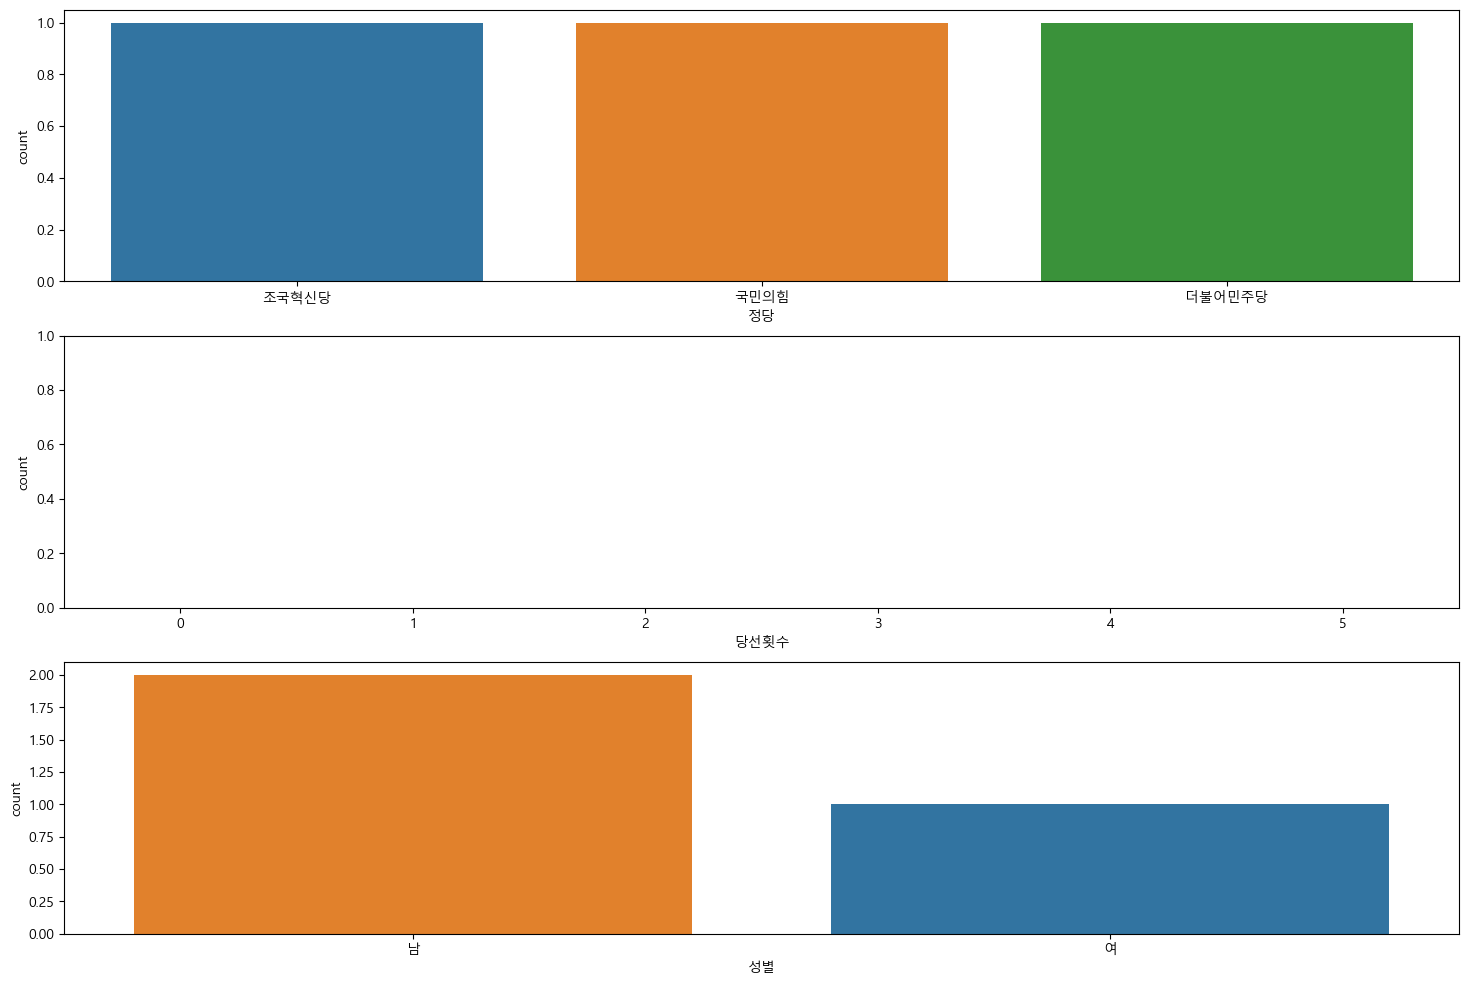

In [ ]:
figure, (axes1,axes2,axes3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,12)

sns.countplot(data=member_df, x='정당', ax=axes1, order=member_df['정당'].value_counts().index, hue='정당')
sns.countplot(data=member_df, x='당선횟수', ax=axes2, order=member_df['당선횟수'].value_counts().index, hue='당선횟수')
sns.countplot(data=member_df, x='성별', ax=axes3, order=member_df['성별'].value_counts().index, hue='성별')

plt.show()

Matplotlib 의 Pie Plot 그려보기


In [ ]:
cdf = member_df['선거구2'].value_counts(normalize=True)
print(cdf.index)
cdf

Index(['비례', '대구', '경기'], dtype='object', name='선거구2')


선거구2
비례    0.333333
대구    0.333333
경기    0.333333
Name: proportion, dtype: float64

<class 'matplotlib.figure.Figure'>


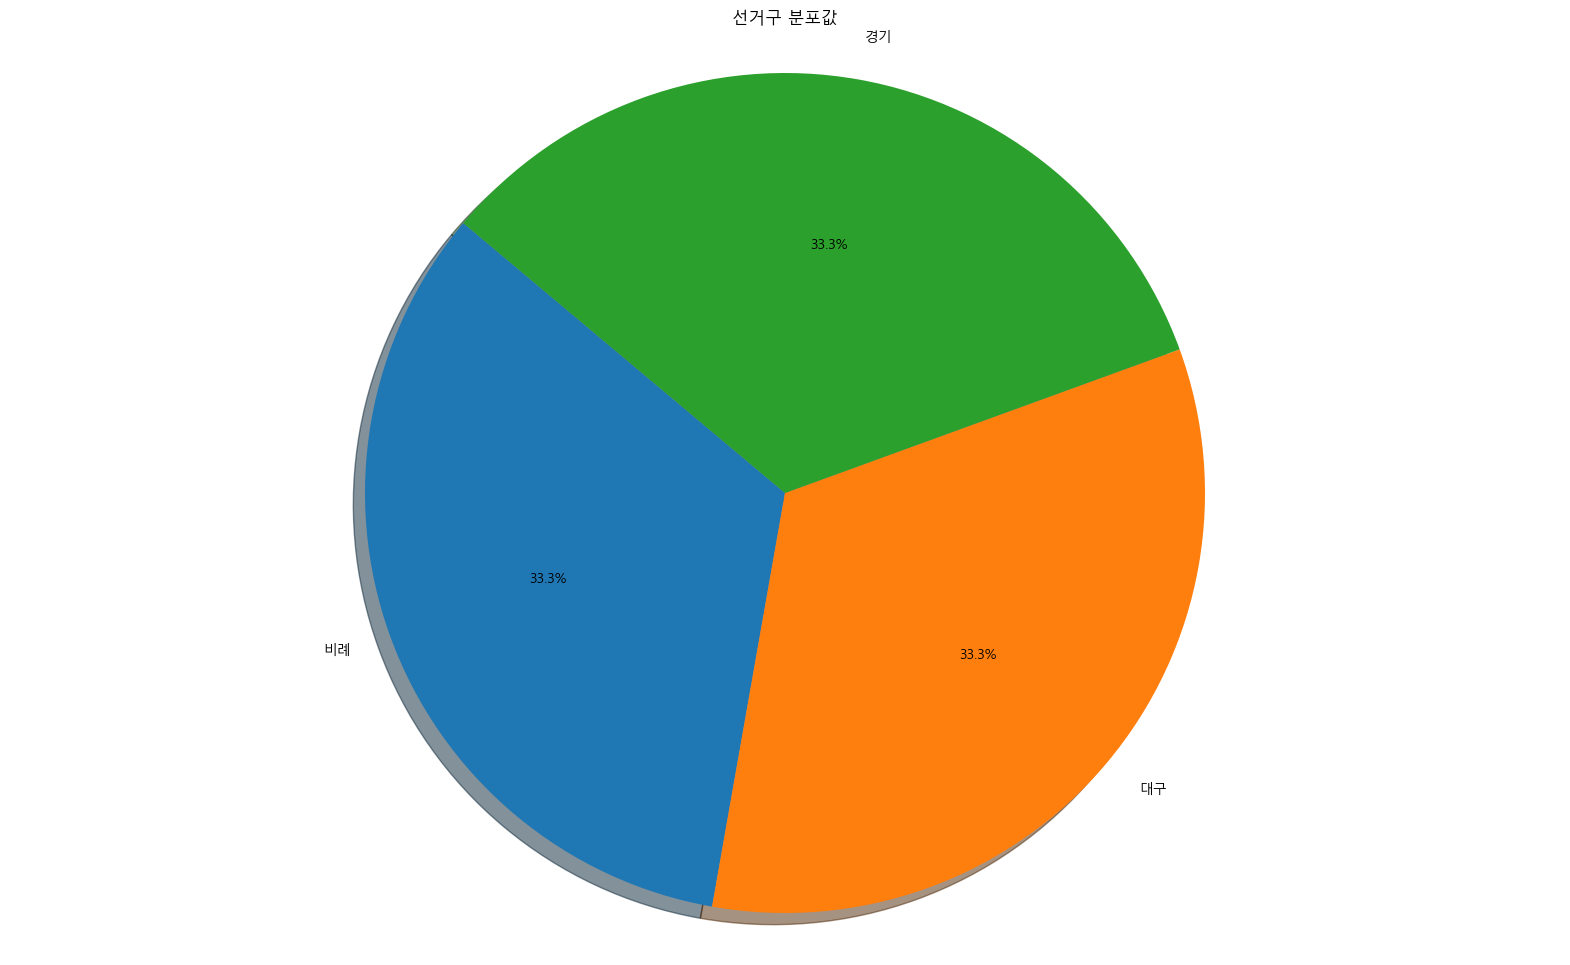

In [ ]:
# figure size 설정
figure = plt.figure(figsize=(20,12))
print(type(figure))
# pie() 함수 - pie plot을 그려주는 함수
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', startangle=140, shadow=True)
# pie plot을 그릴때 원의 형태를 유지하도록 하는 설정
plt.axis('equal')
plt.title('선거구 분포값')
plt.show()

In [ ]:
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

_ = sns.histplot(data=member_df, x='정당', ax=axes1, hue='성별', multiple='dodge',
             palette={'남': 'blue', '여': 'red'}, shrink=0.8)
plt.show()

In [ ]:
member_df.loc[member_df['정당'] == '조국혁신당',['이름','성별']]

In [ ]:
member_df.loc[member_df['정당'] == '조국혁신당',['이름','성별']].groupby('성별').count()


## 다중 빈도 막대 그래프 catplot
다중 빈도 막대그래프는 countplot() 또는 catplot() 이 있습니다.
hue 옵션은 변량을 색상으로 구분하는 파라미터입니다.

In [ ]:
# 선거구 이름들이 빈도순으로 정렬된 리스트입니다.
s_index = member_df['선거구2'].value_counts().index

In [ ]:
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(24,12)

sns.catplot(data=member_df, y='선거구2', hue='성별', kind='count',
             palette={'남': 'navy', '여': 'orange'},
             order=s_index)